

 1. Put it in your portfolio repository, along with any images or interactive html visualization
 2. Add a markdown file to the `posts/02-climate` folder that contains a link to your portfolio.

# Coweeta Hydrologic Laboratory has been collecting climate data since it was established by the US Forest Service in 1934 
## The data available online through the Global Historical Climatology Network includes data from Denver Co & Coweeta which will be compared in this post.
* The Global Historical Climatology Network daily data integrates data from 30 different sources
* Observations are from a variety of meteorological organizations using land-based stations around the globe.
* Temperatures can be displayed in degrees Fahrenheit, but are collected in degrees Celsius
* There are three steps used to integrate data from different countries. Some locations contain historic data only and a quality assurance protocol is used although the data is not homogenous.

# Sources:
* Menne, Matthew J., Imke Durre, Bryant Korzeniewski, Shelley McNeill, Kristy Thomas, Xungang Yin, Steven Anthony, Ron Ray, Russell S. Vose, Byron E.Gleason, and Tamara G. Houston (2012): Global Historical Climatology Network - Daily (GHCN-Daily), Version 3. Coweeta Hydrologic Station USC00312102. NOAA National Climatic Data Center. doi:10.7289/V5D21VHZ Accessed: Nov. 18, 2024.
* Matthew J. Menne, Imke Durre, Russell S. Vose, Byron E. Gleason, and Tamara G. Houston, 2012: An Overview of the Global Historical Climatology Network-Daily Database. J. Atmos. Oceanic Technol., 29, 897-910. doi:10.1175/JTECH-D-11-00103.1.
* https://www.ncei.noaa.gov/pub/data/ghcn/daily/readme.txt


In [39]:
# Import required packages
import holoviews as hv
import hvplot.pandas
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Common statistical plots for tabular data
import seaborn as sns
# Fit an OLS linear regression
from sklearn.linear_model import LinearRegression

In [23]:
GHCnd_url = ('https://www.ncei.noaa.gov/access/services/data/v1'
'?dataset=daily-summaries'
'&dataTypes=TOBS,PRCP'
'&stations=USC00312102'
'&startDate=1961-01-01'
'&endDate=2024-09-30'
'&units=standard'
)
GHCnd_url

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=TOBS,PRCP&stations=USC00312102&startDate=1961-01-01&endDate=2024-09-30&units=standard'

In [24]:
# Import data into Python from NCEI API
nc_climate_df = pd.read_csv(GHCnd_url)

nc_climate_df

,STATION,DATE,PRCP,TOBS
0,USC00312102,1961-01-01,1.12,39.0
1,USC00312102,1961-01-02,0.00,23.0
2,USC00312102,1961-01-03,0.00,29.0
3,USC00312102,1961-01-04,0.00,33.0
4,USC00312102,1961-01-05,0.00,21.0
...,...,...,...,...
23278,USC00312102,2024-09-26,3.48,63.0
23279,USC00312102,2024-09-27,5.61,70.0
23280,USC00312102,2024-09-28,0.60,61.0
23281,USC00312102,2024-09-29,0.27,61.0


In [33]:
# Download the climate data
nc_climate_df = pd.read_csv(
    GHCnd_url,
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN'],
    )
nc_climate_df.dropna()

nc_climate_df

,STATION,PRCP,TOBS
DATE,,,
1961-01-01,USC00312102,1.12,39.0
1961-01-02,USC00312102,0.00,23.0
1961-01-03,USC00312102,0.00,29.0
1961-01-04,USC00312102,0.00,33.0
1961-01-05,USC00312102,0.00,21.0
...,...,...,...
2024-09-26,USC00312102,3.48,63.0
2024-09-27,USC00312102,5.61,70.0
2024-09-28,USC00312102,0.60,61.0


In [34]:
if not isinstance(nc_climate_df.index, pd.DatetimeIndex):
    # Assuming a column 'Date' or similar contains datetime information
    nc_climate_df.set_index('Date', inplace=True)

In [35]:
nc_climate_df['temp_c'] = (nc_climate_df['TOBS'] - 32) * 5 / 9

nc_climate_df

,STATION,PRCP,TOBS,temp_c
DATE,,,,
1961-01-01,USC00312102,1.12,39.0,3.888889
1961-01-02,USC00312102,0.00,23.0,-5.000000
1961-01-03,USC00312102,0.00,29.0,-1.666667
1961-01-04,USC00312102,0.00,33.0,0.555556
1961-01-05,USC00312102,0.00,21.0,-6.111111
...,...,...,...,...
2024-09-26,USC00312102,3.48,63.0,17.222222
2024-09-27,USC00312102,5.61,70.0,21.111111
2024-09-28,USC00312102,0.60,61.0,16.111111


<Axes: title={'center': 'Daily Temperature at Coweeta Hydrological Lab'}, xlabel='Date', ylabel='Temperature ($^\\circ$F)'>

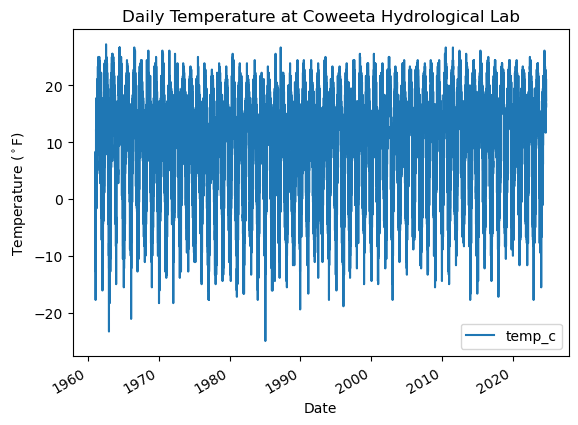

In [36]:
# Plot the data using .plot
nc_climate_df.plot(
    y='temp_c',
    title='Daily Temperature at Coweeta Hydrological Lab',
    xlabel='Date',
    ylabel='Temperature ($^\circ$F)')

In [41]:
# Calculate the mean temperature
mean_temp = nc_climate_df['temp_c'].mean()
print("Mean Temperature:", mean_temp)


Mean Temperature: 10.085713600498837


In [43]:
# Group by year and calculate the mean temperature
yearly_avg_temp = nc_climate_df.groupby(nc_climate_df.index.year)['temp_c'].mean()

print(yearly_avg_temp)

DATE
1961    10.856227
1962    11.321157
1963    10.462454
1964    13.897243
1965    11.004566
          ...    
2020    10.918336
2021    10.313546
2022    10.111111
2023    10.490107
2024    12.862936
Name: temp_c, Length: 64, dtype: float64


In [69]:
# Convert the Series to a DataFrame with 'Year' as the index
nc_ann_climate_df = yearly_avg_temp.to_frame(name='Average_Temperature')

# Reset the index to make 'Year' a regular column
nc_ann_climate_df.reset_index('DATE', inplace=True)
print(nc_ann_climate_df.head())

   DATE  Average_Temperature
0  1961            10.856227
1  1962            11.321157
2  1963            10.462454
3  1964            13.897243
4  1965            11.004566


In [67]:
nc_ann_climate_df = nc_ann_climate_df.loc['1961':'2024']

# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(nc_ann_climate_df[['DATE']], nc_ann_climate_df['Average_Temperature'])

# Calculate and print the metrics
slope = model.coef_[0]
print(f"Slope: {slope:.2f} degrees Celsius per year")

Slope: 0.00 degrees Celsius per year


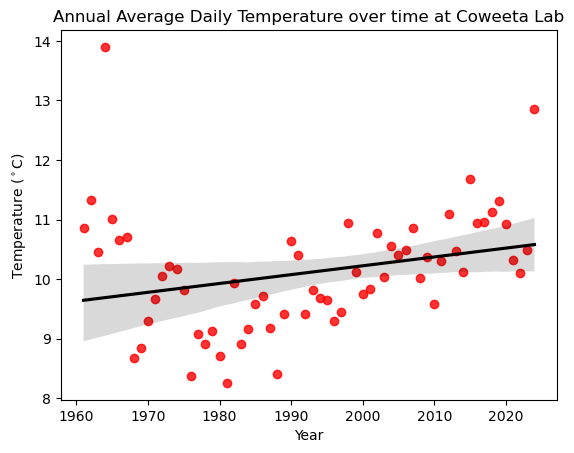

In [71]:
ax = sns.regplot(
    x=nc_ann_climate_df.DATE, 
    y=nc_ann_climate_df.Average_Temperature,
    color='red',
    line_kws={'color': 'black'})
ax.set(
    title='Annual Average Daily Temperature over time at Coweeta Lab',
    xlabel='Year',
    ylabel='Temperature ($^\circ$C)'
)
plt.show()